In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\ADMIN\Downloads\LondonBikeData\*.csv"
files = glob.glob(path)

print("Files found:", len(files))

df_list = []
for file in files:
    temp = pd.read_csv(file)
    temp["source_file"] = file
    df_list.append(temp)

df = pd.concat(df_list, ignore_index=True)

Files found: 24


In [3]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018406 entries, 0 to 9018405
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Number                int64  
 1   Start date            object 
 2   Start station number  int64  
 3   Start station         object 
 4   End date              object 
 5   End station number    int64  
 6   End station           object 
 7   Bike number           float64
 8   Bike model            object 
 9   Total duration        object 
 10  Total duration (ms)   int64  
 11  source_file           object 
dtypes: float64(1), int64(4), object(7)
memory usage: 825.7+ MB


,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),source_file
count,9.018406e+06,9018406,9.018406e+06,9018406,9018406,9.018406e+06,9018406,9.018405e+06,9018406,9018406,9.018406e+06,9018406
unique,NaN,483010,NaN,822,483265,NaN,823,NaN,2,31875,NaN,24
top,NaN,2024-06-27 08:36,NaN,"Hyde Park Corner, Hyde Park",2024-10-17 08:51,NaN,"Hyde Park Corner, Hyde Park",NaN,CLASSIC,7m 48s,NaN,C:\Users\ADMIN\Downloads\LondonBikeData\403Jou...
freq,NaN,107,NaN,66505,125,NaN,61728,NaN,7659302,7563,NaN,602120
mean,1.444483e+08,NaN,2.257295e+05,NaN,NaN,2.236257e+05,NaN,5.160014e+04,NaN,NaN,1.371443e+06,NaN
std,2.669969e+06,NaN,5.679331e+06,NaN,NaN,5.631848e+06,NaN,1.140445e+04,NaN,NaN,1.888357e+07,NaN
min,1.398067e+08,NaN,9.590000e+02,NaN,NaN,9.590000e+02,NaN,2.000000e+00,NaN,NaN,1.960000e+02,NaN
25%,1.421407e+08,NaN,1.124000e+03,NaN,NaN,1.122000e+03,NaN,5.134200e+04,NaN,NaN,4.605710e+05,NaN
50%,1.444569e+08,NaN,3.464000e+03,NaN,NaN,3.463000e+03,NaN,5.508900e+04,NaN,NaN,7.875360e+05,NaN
75%,1.467585e+08,NaN,2.001780e+05,NaN,NaN,2.001780e+05,NaN,5.862900e+04,NaN,NaN,1.261376e+06,NaN


In [4]:
df = df.drop_duplicates()
df = df.dropna()

df["Start date"] = pd.to_datetime(df["Start date"], format='mixed', dayfirst=True)

df["DayOfWeek"] = df["Start date"].dt.day_name()
df["Month"] = df["Start date"].dt.month
df["Hour"] = df["Start date"].dt.hour
df["Date"] = df["Start date"].dt.date

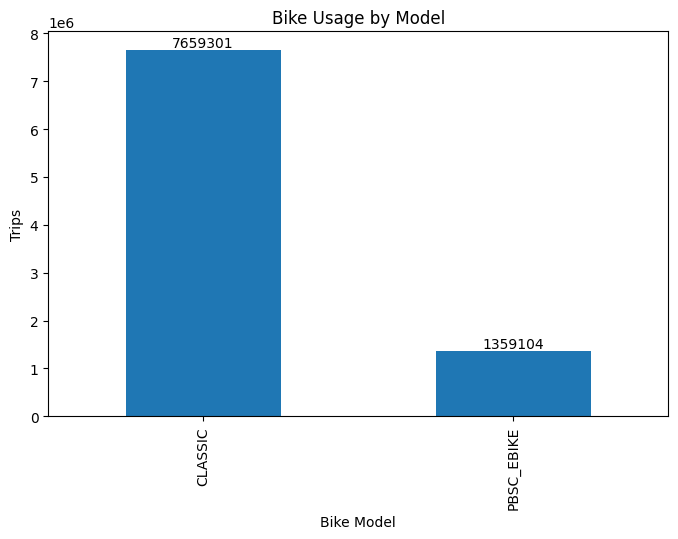

In [5]:
bike_usage = df["Bike model"].value_counts()

plt.figure(figsize=(8,5))
ax = bike_usage.plot(kind="bar")

plt.title("Bike Usage by Model")
plt.xlabel("Bike Model")
plt.ylabel("Trips")

for i, v in enumerate(bike_usage.values):
    ax.text(i, v, str(v), ha="center", va="bottom")

plt.show()

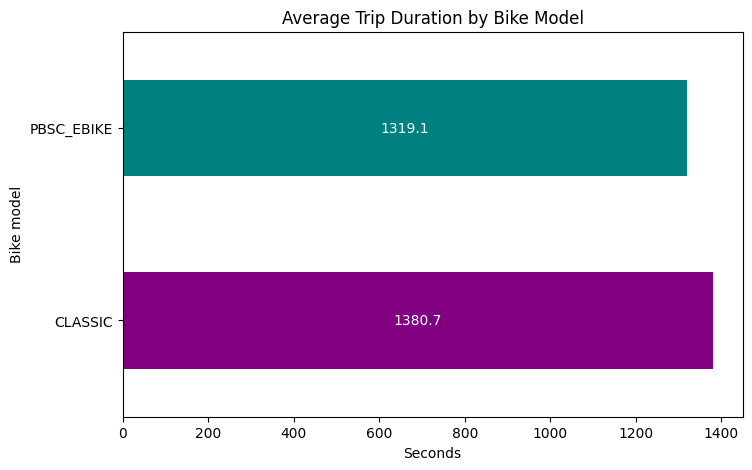

In [6]:
# Calculate average trip duration (in seconds) by bike model
avg_duration = df.groupby("Bike model")["Total duration (ms)"].mean() / 1000

plt.figure(figsize=(8,5))
ax = avg_duration.plot(
    kind="barh",
    color=["purple", "teal", "goldenrod", "slateblue"]
)

plt.title("Average Trip Duration by Bike Model")
plt.xlabel("Seconds")

for i, v in enumerate(avg_duration.values):
    ax.text(v/2, i, f"{v:.1f}", va="center", ha="center", color="white", fontsize=10)

plt.show()

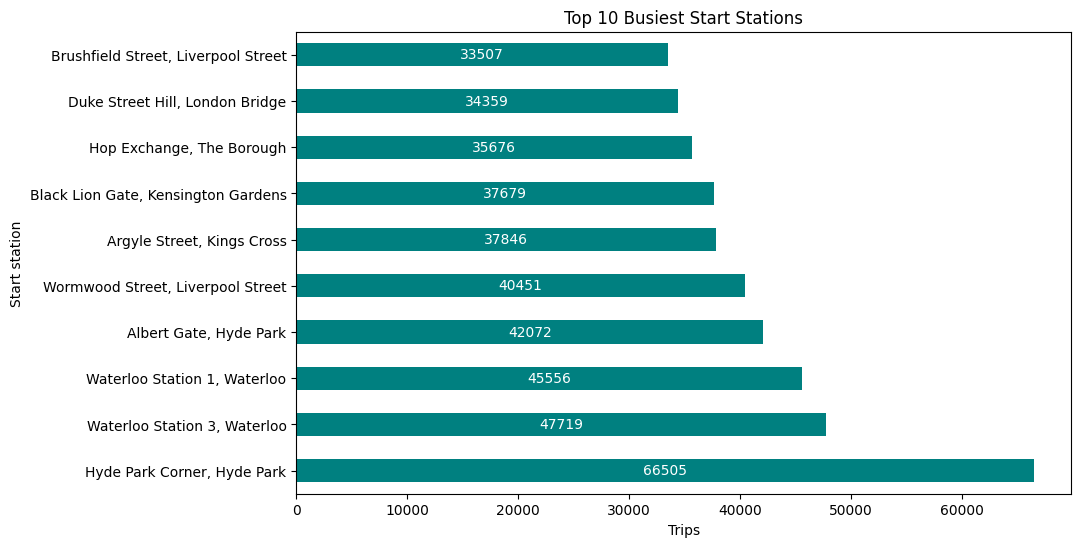

In [7]:
busiest_stations = df["Start station"].value_counts().head(10)

plt.figure(figsize=(10,6))
ax = busiest_stations.plot(
    kind="barh",
    color="teal"
)

plt.title("Top 10 Busiest Start Stations")
plt.xlabel("Trips")

for i, v in enumerate(busiest_stations.values):
    ax.text(v/2, i, str(v), va="center", ha="center", color="white", fontsize=10)

plt.show()

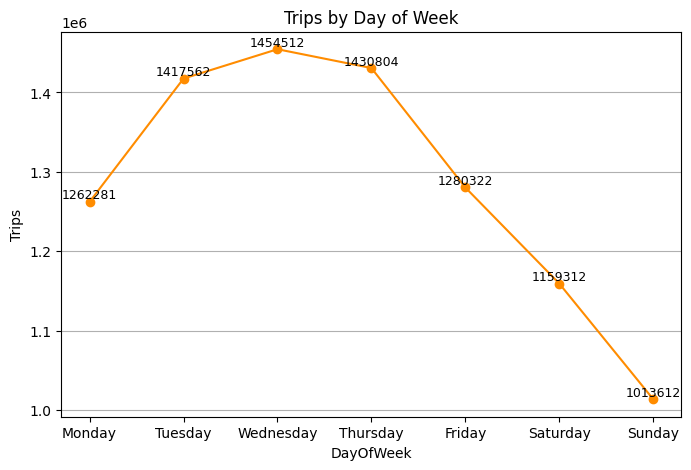

In [8]:
# Calculate trip counts by day of week, ordered
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = df["DayOfWeek"].value_counts().reindex(day_order)

plt.figure(figsize=(8,5))
ax = day_counts.plot(
    kind="line",
    marker="o",
    color="darkorange"
)

plt.title("Trips by Day of Week")
plt.ylabel("Trips")
plt.grid(True, axis="y")

for i, v in enumerate(day_counts.values):
    ax.text(i, v, str(v), ha="center", va="bottom", fontsize=9)

plt.show()

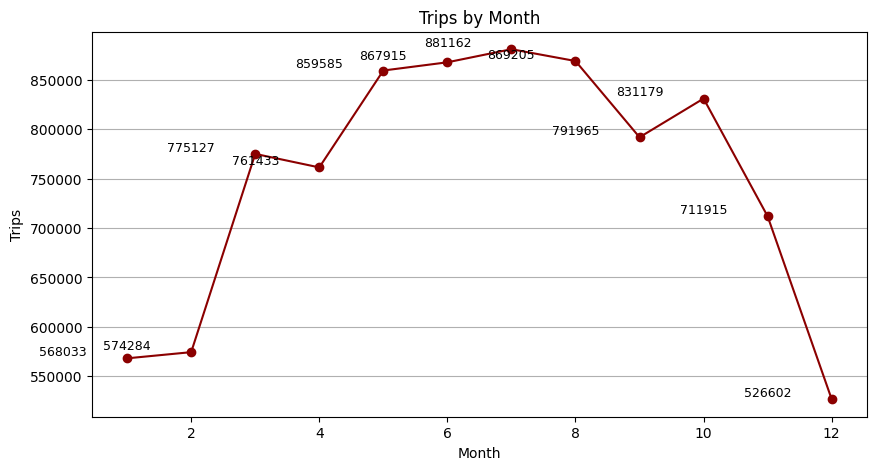

In [9]:
# Calculate trip counts by month
month_counts = df["Month"].value_counts().sort_index()

plt.figure(figsize=(10,5))
ax = month_counts.plot(
    kind="line",
    marker="o",
    color="darkred"
)

plt.title("Trips by Month")
plt.ylabel("Trips")
plt.grid(True, axis="y")

for i, v in enumerate(month_counts.values):
    ax.text(i, v, str(v), ha="center", va="bottom", fontsize=9)

plt.show()

In [10]:
daily_demand = df.groupby("Date").size().reset_index(name="Trips")

daily_demand["Date"] = pd.to_datetime(daily_demand["Date"])
daily_demand["Day"] = daily_demand["Date"].dt.day
daily_demand["Month"] = daily_demand["Date"].dt.month
daily_demand["Weekday"] = daily_demand["Date"].dt.weekday

In [11]:
X = daily_demand[["Day", "Month", "Weekday"]]
y = daily_demand["Trips"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [12]:
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 Score: 0.0036876066673989794
RMSE: 5830.437739641692


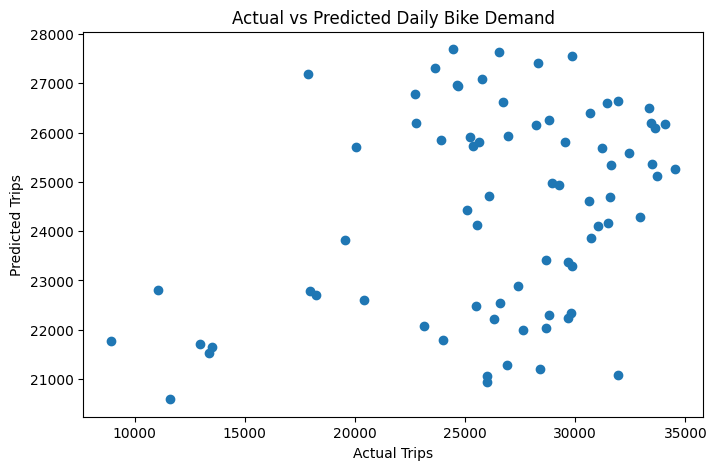

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Daily Bike Demand")
plt.show()